<a href="https://colab.research.google.com/github/spandangupta/Data606/blob/master/SPAM_NBHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
!pip install pydot

In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from pydot import graph_from_dot_data
#https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

In [0]:
def fetch_sms_spam():
  import requests # requests is a handy http library
  import zipfile # a zip library
  r=requests.get('http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/smsspamcollection.zip')
  # I know of no way to get data out of a zipfile without saving to disk extracting and reading in, sigh
  zf=open('smsspam.zip','wb')
  zf.write(r.content)
  zip_ref = zipfile.ZipFile('smsspam.zip', 'r')
  zip_ref.extractall('smsspam')
  zip_ref.close()
  zf.close
  sms_file=open('smsspam/SMSSpamCollection.txt','r')
  #object to return
  data = {'data':[], 'target':[], 'target_classes': ['ham', 'spam']}
  # First tab splits the class and the SMS message
  for line in sms_file:
    idx = line.find('\t')
    target = line[:idx]
    doc = line[idx+1:]
    data['data'] += [doc]
    if target == 'ham': data['target'] += [0]
    else: data['target'] += [1]
  sms_file.close()
  return data

In [0]:
data=fetch_sms_spam()
print(data)

{'data': ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n', 'Ok lar... Joking wif u oni...\n', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n", 'U dun say so early hor... U c already then say...\n', "Nah I don't think he goes to usf, he lives around here though\n", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv\n", 'Even my brother is not like to speak with me. They treat me like aids patent.\n', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours 

In [0]:
train_df, test_df= train_test_split(data['data'], random_state=3)
train1, test1= train_test_split(data['target'], random_state=3)

In [0]:
#TDIDF
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer11 = TfidfVectorizer()

In [0]:
#TDIDF
vectors_train1=vectorizer11.fit_transform(train_df)
vectors_test1=vectorizer11.transform(test_df)

In [0]:
#TDIDF
print(vectorizer11.vocabulary_)

{'and': 940, 'half': 3217, 'years': 7458, 'missed': 4386, 'your': 7487, 'friendship': 2930, 'hi': 3330, 'babe': 1167, 'its': 3658, 'chloe': 1763, 'how': 3425, 'was': 7172, 'smashed': 6062, 'on': 4790, 'saturday': 5736, 'night': 4648, 'it': 3650, 'great': 3150, 'weekend': 7220, 'been': 1266, 'missing': 4388, 'me': 4289, 'sp': 6163, 'visionsms': 7086, 'com': 1864, 'text': 6579, 'stop': 6304, 'to': 6727, '150p': 296, 'you': 7482, 'know': 3845, 'there': 6625, 'is': 3639, 'shall': 5876, 'speak': 6174, 'in': 3536, 'lt': 4133, 'gt': 3172, 'minutes': 4376, 'then': 6620, 'the': 6607, 'actual': 789, 'exam': 2638, 'harder': 3251, 'than': 6592, 'nbme': 4586, 'any': 971, 'chance': 1686, 'might': 4349, 'have': 3267, 'had': 3206, 'with': 7324, 'evaporated': 2606, 'as': 1063, 'soon': 6136, 'violated': 7076, 'my': 4537, 'privacy': 5263, 'by': 1554, 'stealing': 6279, 'phone': 5036, 'number': 4723, 'from': 2943, 'employer': 2533, 'paperwork': 4923, 'not': 4697, 'cool': 1962, 'at': 1094, 'all': 892, 'plea

In [0]:
vectorizer = CountVectorizer()
vectors_train=vectorizer.fit_transform(train_df)
vectors_test=vectorizer.transform(test_df)


In [0]:
print(vectorizer11.vocabulary_)

{'and': 940, 'half': 3217, 'years': 7458, 'missed': 4386, 'your': 7487, 'friendship': 2930, 'hi': 3330, 'babe': 1167, 'its': 3658, 'chloe': 1763, 'how': 3425, 'was': 7172, 'smashed': 6062, 'on': 4790, 'saturday': 5736, 'night': 4648, 'it': 3650, 'great': 3150, 'weekend': 7220, 'been': 1266, 'missing': 4388, 'me': 4289, 'sp': 6163, 'visionsms': 7086, 'com': 1864, 'text': 6579, 'stop': 6304, 'to': 6727, '150p': 296, 'you': 7482, 'know': 3845, 'there': 6625, 'is': 3639, 'shall': 5876, 'speak': 6174, 'in': 3536, 'lt': 4133, 'gt': 3172, 'minutes': 4376, 'then': 6620, 'the': 6607, 'actual': 789, 'exam': 2638, 'harder': 3251, 'than': 6592, 'nbme': 4586, 'any': 971, 'chance': 1686, 'might': 4349, 'have': 3267, 'had': 3206, 'with': 7324, 'evaporated': 2606, 'as': 1063, 'soon': 6136, 'violated': 7076, 'my': 4537, 'privacy': 5263, 'by': 1554, 'stealing': 6279, 'phone': 5036, 'number': 4723, 'from': 2943, 'employer': 2533, 'paperwork': 4923, 'not': 4697, 'cool': 1962, 'at': 1094, 'all': 892, 'plea

In [0]:
print(vectorizer11.idf_)

[7.39239558 6.29378329 8.64515855 ... 8.64515855 8.64515855 8.64515855]


In [0]:
print(vectors_train.shape)

(4180, 7520)


In [0]:
print(vectors_train1)
print(vectors_test1)

  (0, 940)	0.22055241227229
  (0, 3217)	0.4449282814542753
  (0, 7458)	0.4832096725824512
  (0, 4386)	0.4716575847610995
  (0, 7487)	0.24452695931841478
  (0, 2930)	0.4874931374179497
  (1, 7487)	0.10169102873932209
  (1, 3330)	0.152574406561179
  (1, 1167)	0.16240757588878155
  (1, 3658)	0.13247451733108537
  (1, 1763)	0.26942872342949264
  (1, 3425)	0.24475083911391537
  (1, 7172)	0.4039978505304076
  (1, 6062)	0.2567922927809515
  (1, 4790)	0.10767549791824084
  (1, 5736)	0.2087839030612004
  (1, 4648)	0.1497711452402404
  (1, 3650)	0.10015341646863005
  (1, 3150)	0.152574406561179
  (1, 7220)	0.1894913773436329
  (1, 1266)	0.1504486778514013
  (1, 4388)	0.21109349821969356
  (1, 4289)	0.09817190561401994
  (1, 6163)	0.2225537412563497
  (1, 7086)	0.2567922927809515
  :	:
  (4178, 6871)	0.2715883607310679
  (4178, 5694)	0.3003435703884197
  (4178, 2500)	0.3266631515269101
  (4178, 4491)	0.22615283809335585
  (4178, 3958)	0.28374274346625855
  (4178, 3904)	0.27474438547672286
  (4178

In [0]:
print(vectors_train1.shape)
print(vectors_train1.toarray())

(4180, 7520)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
nb = MultinomialNB(alpha=.1)
nb.fit(vectors_train, train_df)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [0]:
print(confusion_matrix(nb.predict(vectors_test), test_df))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
tree = DecisionTreeClassifier()
#tree.criterion = 'entropy'
tree.fit(vectors_train1, train1)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
sum(tree.predict(vectors_train1)==train1)


4180

In [0]:
sum(tree.predict(vectors_test1)==test1)

1349

In [0]:
confusion_matrix(tree.predict(vectors_test1),test1)

array([[1201,   28],
       [  17,  148]])

In [0]:
tree.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
!pip install pydotplus

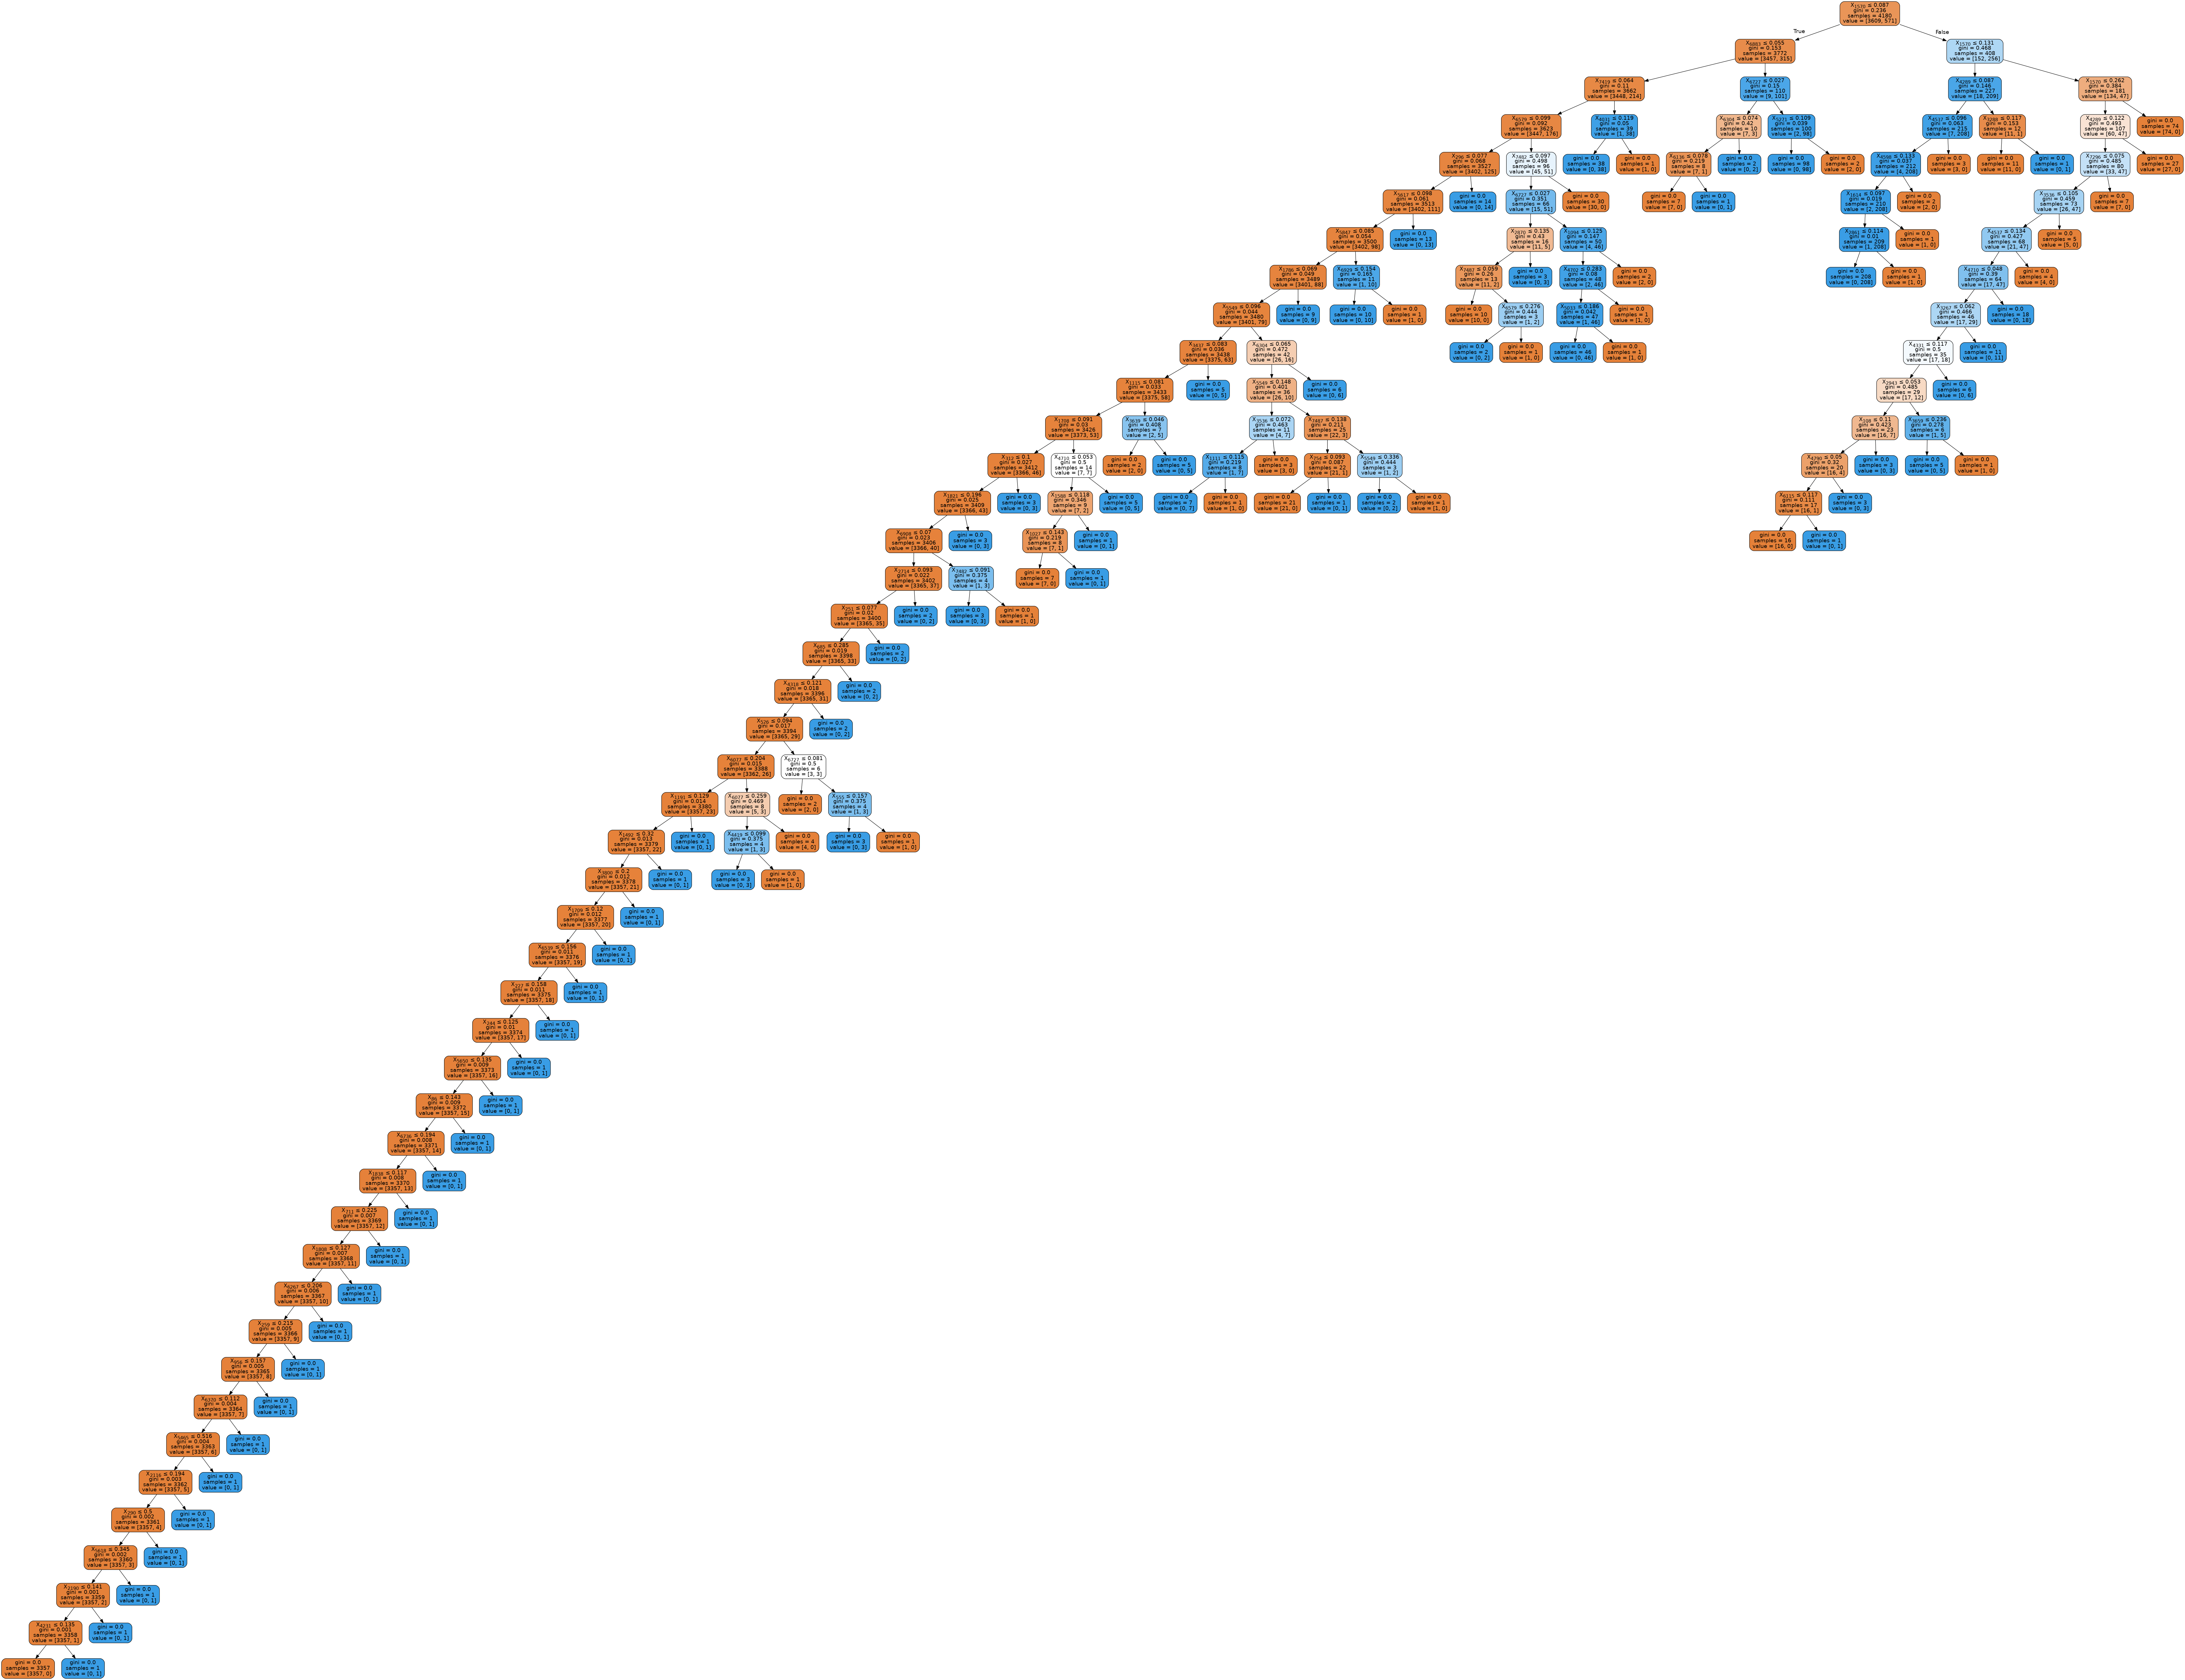

In [0]:
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  

path=StringIO()
export_graphviz(tree, out_file=path,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(path.getvalue())
Image(graph.create_png())

In [0]:
lr = LogisticRegression()
lr.fit(vectors_test1, test1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
sum(lr.predict(vectors_test1)==test1)


1330

In [0]:
confusion_matrix(lr.predict(vectors_test1),test1)

array([[1218,   64],
       [   0,  112]])